In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('instagram.csv')

In [3]:
df.keys()

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [5]:
df.category_1.value_counts()

Music                        235
Cinema & Actors/actresses    214
Sports with a ball           113
Lifestyle                     99
Shows                         43
Modeling                      36
Beauty                        28
Humor & Fun & Happiness       18
Art/Artists                   12
Family                        11
Fitness & Gym                 10
Fashion                        9
Computers & Gadgets            9
Racing Sports                  7
Adult content                  6
Cars & Motorbikes              5
Finance & Economics            5
Clothing & Outfits             5
Photography                    4
Business & Careers             4
Food & Cooking                 3
Literature & Journalism        3
Nature & landscapes            3
Management & Marketing         2
Science                        2
Animals                        1
Accessories & Jewellery        1
Education                      1
Luxury                         1
Machinery & Technologies       1
Kids & Toy

In [6]:
#how many null values are there in each column
df.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [7]:
df.category_2.value_counts()

Cinema & Actors/actresses    59
Lifestyle                    55
Modeling                     30
Fashion                      18
Art/Artists                  17
Shows                        16
Music                        15
Beauty                       12
Family                       10
Humor & Fun & Happiness      10
Sports with a ball            6
Photography                   6
Business & Careers            6
Clothing & Outfits            5
Machinery & Technologies      5
Luxury                        3
Shopping & Retail             2
Comics & sketches             2
Fitness & Gym                 2
Literature & Journalism       1
Trainers & Coaches            1
Finance & Economics           1
Cars & Motorbikes             1
Adult content                 1
Science                       1
Kids & Toys                   1
Computers & Gadgets           1
Name: category_2, dtype: int64

In [8]:
df.keys()

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

In [9]:
df

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K


In [10]:
#remove duplicates from influencer insta name
df.drop_duplicates(subset='Influencer insta name', keep='first', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     997 non-null    object
 1   instagram name            976 non-null    object
 2   category_1                889 non-null    object
 3   category_2                286 non-null    object
 4   Followers                 997 non-null    object
 5   Audience country(mostly)  984 non-null    object
 6   Authentic engagement
    997 non-null    object
 7   Engagement avg
          997 non-null    object
dtypes: object(8)
memory usage: 70.1+ KB


In [12]:
#convert number from M, B, to actual number
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1]) * 1000000
    elif x[-1] == 'B':
        return float(x[:-1]) * 1000000000
    else:
        return float(x)

#convert actual number to M, B
def convert_to_M_B(x):
    if x >= 1000000000:
        return str(round(x/1000000000, 2)) + 'B'
    elif x >= 1000000:
        return str(round(x/1000000, 2)) + 'M'
    else:
        return str(round(x, 2))
df['Followers'] = df['Followers'].apply(convert_to_number).astype(int)

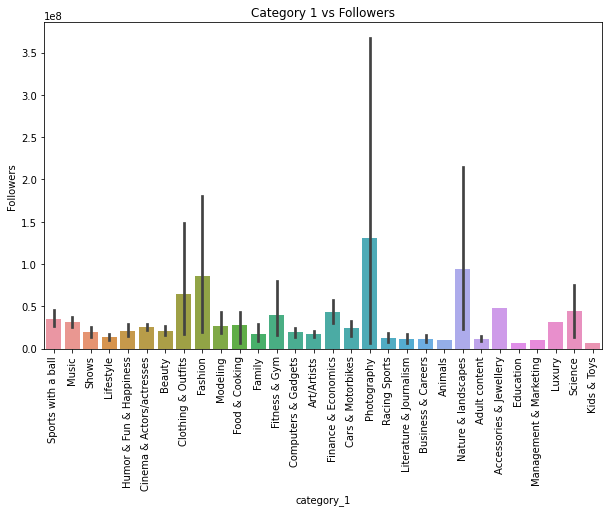

In [13]:
#plot category_1 vs followers using sns
plt.figure(figsize=(10, 6))
sns.barplot(x='category_1', y='Followers', data=df)
#the x axis names are too long, so we rotate them
plt.xticks(rotation=90)
plt.title('Category 1 vs Followers')
plt.show()

C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4463 (\N{HANGUL JUNGSEONG WEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG 

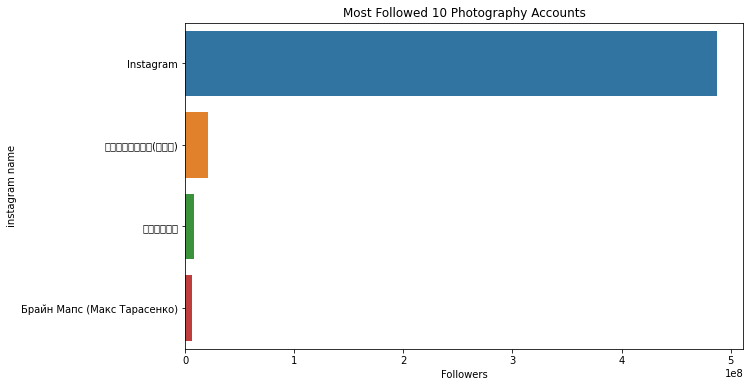

In [14]:
#plot most followed 10 accounts wchich are in photography category
plt.figure(figsize=(10, 6))
sns.barplot(x='Followers', y='instagram name', data=df[df.category_1 == 'Photography'].sort_values('Followers', ascending=False))
plt.title('Most Followed 10 Photography Accounts')
plt.show()

([<matplotlib.patches.Wedge at 0x1a1a45afa00>,
 [Text(0.9873186115929112, 0.48497624601855127, 'Selena Gomez'),
  Text(0.2290641335129593, 1.0758855063332518, 'Ariana Grande'),
  Text(-0.624592684721483, 0.905474449221186, 'Beyoncé'),
  Text(-1.0616346715770004, 0.28797886051860616, 'Justin Bieber'),
  Text(-1.0236943628197421, -0.4025541597488246, 'Taylor Swift'),
  Text(-0.6169242256486522, -0.9107164760823266, 'Jennifer Lopez'),
  Text(-0.031772841028890116, -1.0995410345107421, 'Barbie'),
  Text(0.510696091675927, -0.9742635690340338, 'Miley Cyrus'),
  Text(0.8995119772020791, -0.6331494317062969, 'KATY PERRY'),
  Text(1.08006642725871, -0.2084622572760021, 'Demi Lovato')],
 [Text(0.5385374245052242, 0.2645324978283007, '14.5%'),
  Text(0.12494407282525051, 0.5868466398181372, '14.3%'),
  Text(-0.3406869189389907, 0.4938951541206469, '11.6%'),
  Text(-0.5790734572238183, 0.15707937846469425, '10.7%'),
  Text(-0.558378743356223, -0.21957499622663157, '9.7%'),
  Text(-0.336504123081

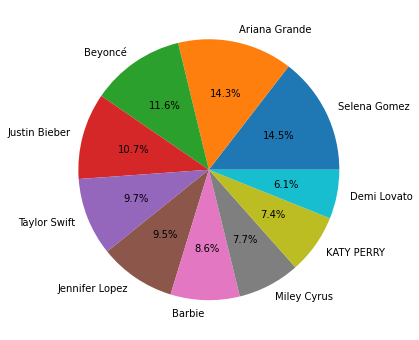

In [15]:
#plot pie chart for music in category_1 vs followers with percentage included
plt.figure(figsize=(10, 6))
plt.pie(df[df.category_1 == 'Music'].sort_values('Followers', ascending=False).head(10)['Followers'], labels=df[df.category_1 == 'Music'].sort_values('Followers', ascending=False).head(10)['instagram name'], autopct='%1.1f%%')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

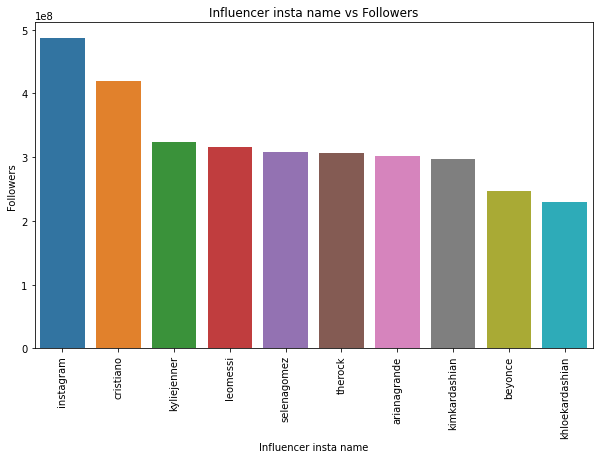

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


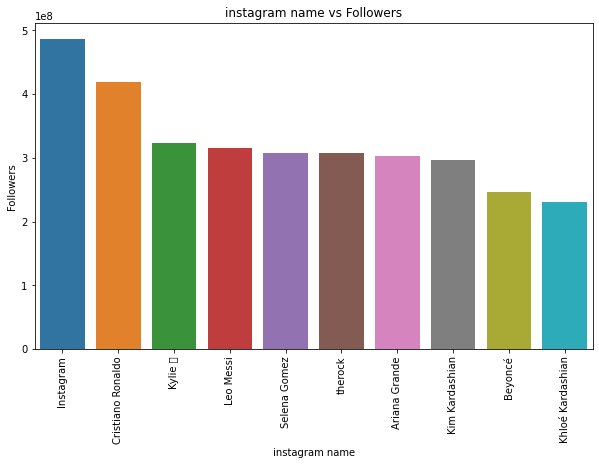

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

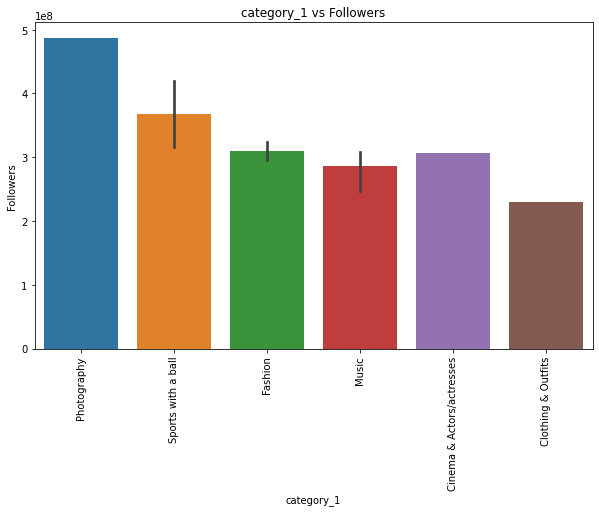

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

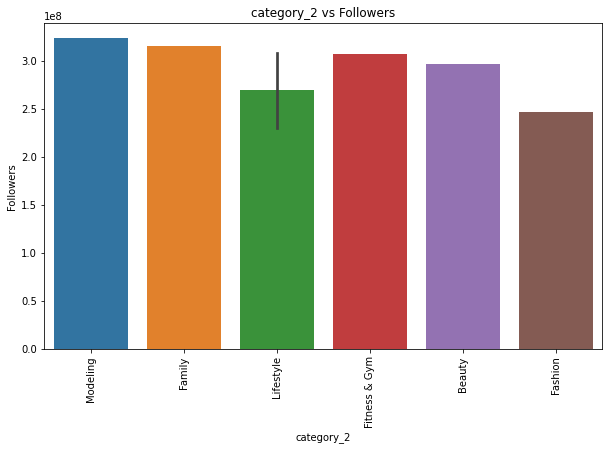

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

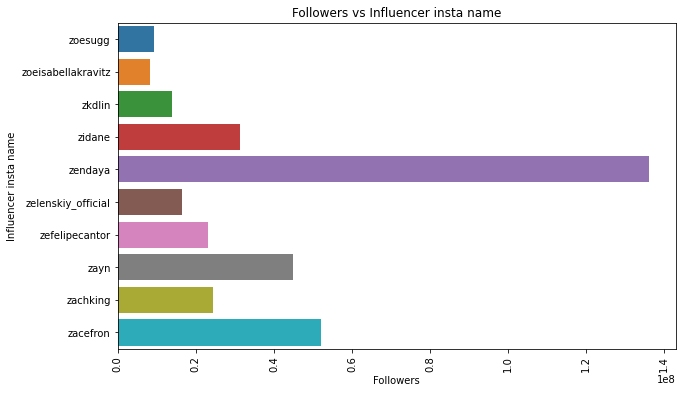

C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  

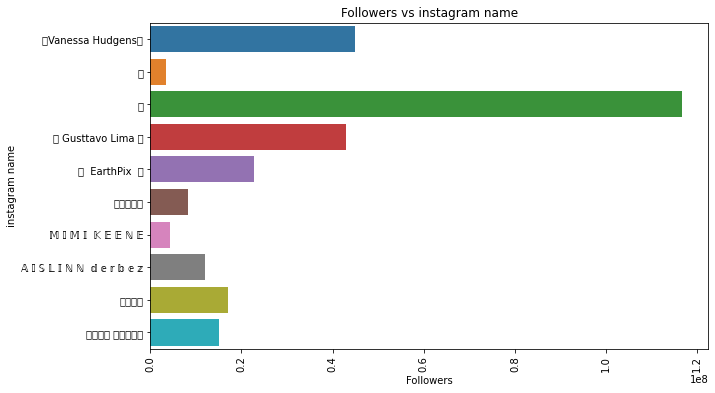

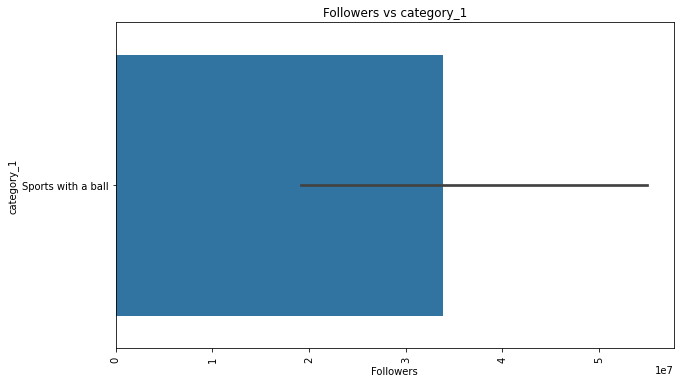

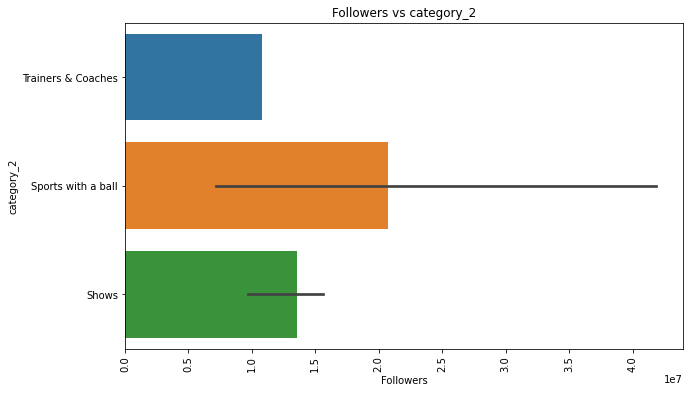

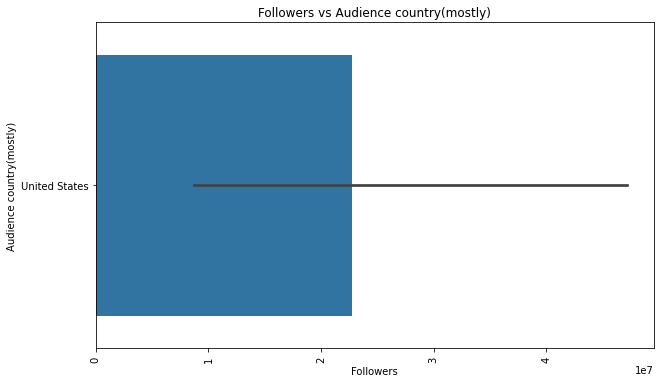

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


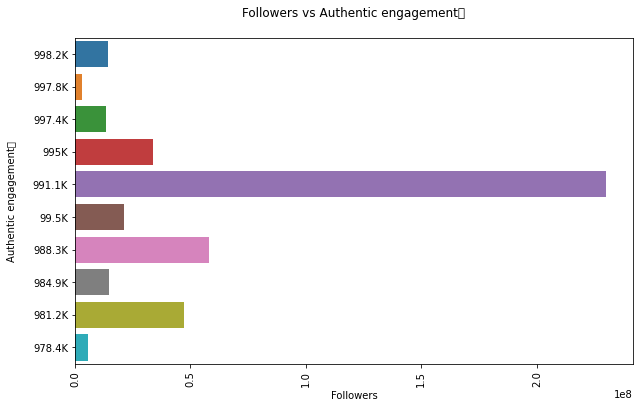

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


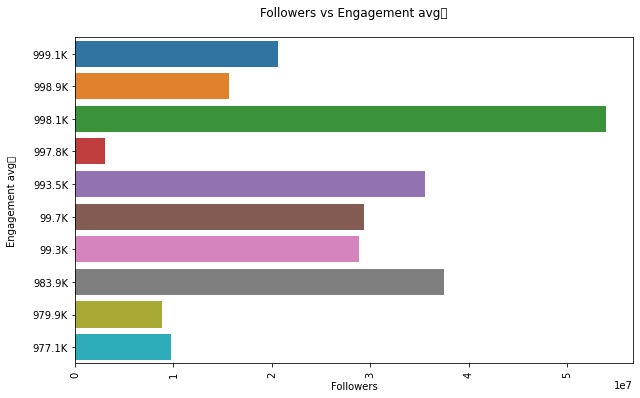

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

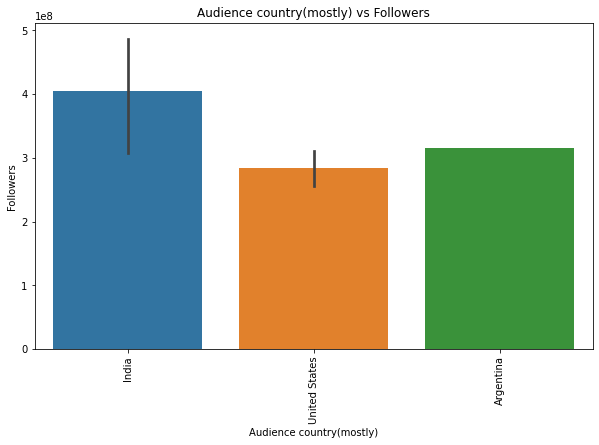

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


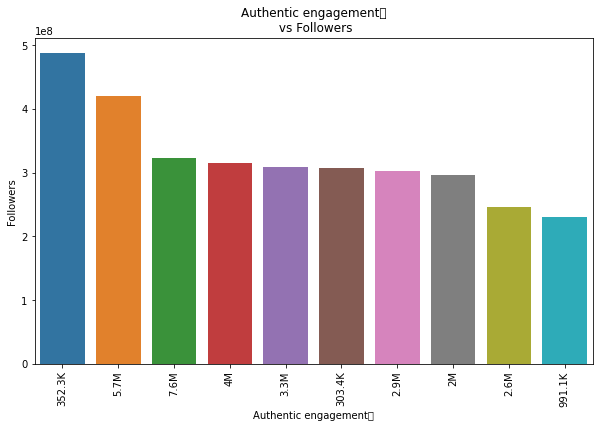

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


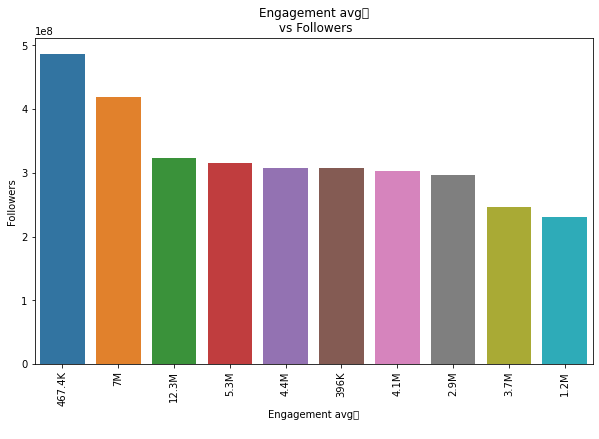

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [16]:
#make all possible graphs from the dataset with correct exception handling with only top 10 results from each column
for i in df.keys():
    for j in df.keys():
        if i != j:
            try:
                plt.figure(figsize=(10, 6))
                sns.barplot(x=i, y=j, data=df.sort_values(j, ascending=False).head(10))
                plt.xticks(rotation=90)
                plt.title(i + ' vs ' + j)
                plt.show()
            except:
                pass

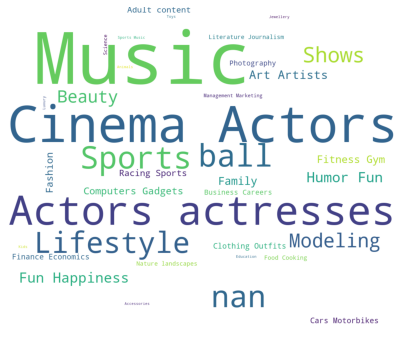

In [17]:
#make a word cloud of category_1
df['category_1'] = df['category_1'].astype(str)
from wordcloud import WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white', width=1200, height=1000).generate(' '.join(df.category_1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
df

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48500000,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12700000,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13500000,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,nan,NaN,11100000,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136100000,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31200000,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13900000,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8199999,United States,583K,885.5K


<AxesSubplot:xlabel='Audience country(mostly)', ylabel='Followers'>

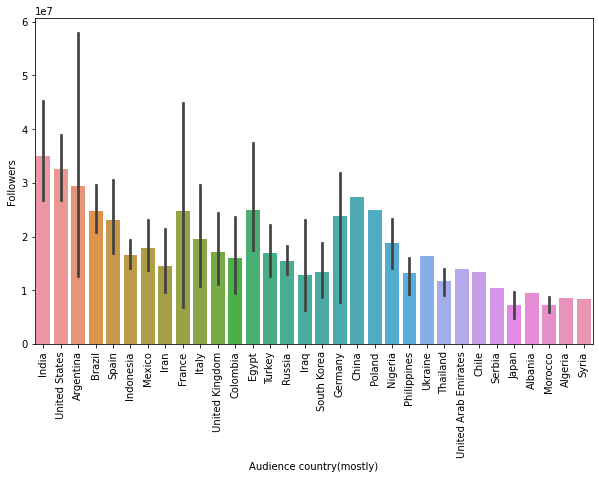

In [19]:
#followers vs country
plt.figure(figsize=(10, 6))
#rotate the x axis names
plt.xticks(rotation=90)
sns.barplot(x='Audience country(mostly)', y='Followers', data=df.sort_values('Followers', ascending=False))

<AxesSubplot:xlabel='Followers', ylabel='instagram name'>

C:\Users\lnavn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


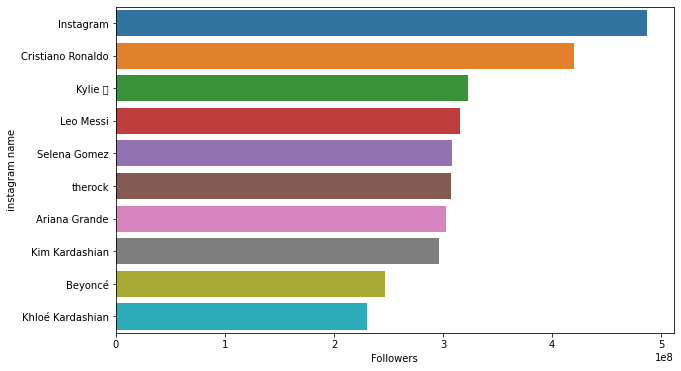

In [20]:
#top 10 instagram accounts with most followers
plt.figure(figsize=(10, 6))
sns.barplot(x='Followers', y='instagram name', data=df.sort_values('Followers', ascending=False).head(10))

<AxesSubplot:xlabel='Followers', ylabel='Authentic engagement\r\n'>

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


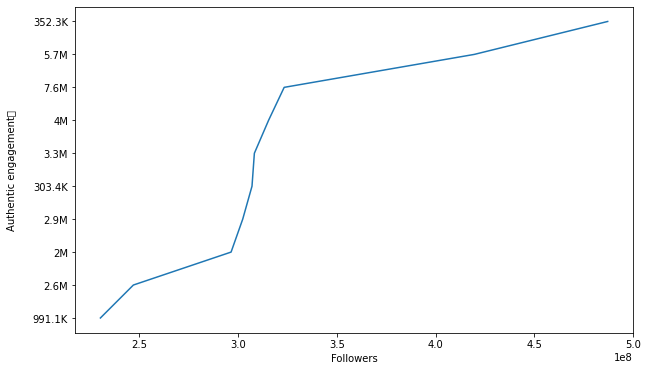

In [23]:
#authentic engagement rate vs followers line graph for top 10 accounts
plt.figure(figsize=(10, 6))
sns.lineplot(x='Followers', y='Authentic engagement\r\n', data=df.sort_values('Followers', ascending=False).head(10))